## Sequence Prediction using RNN

In this exercise, we try to predict values of a curve given earlier data points.

We will formulate our problem like this – given a sequence of 50 numbers belonging to a sine wave, predict the 51st number in the series

In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model      # type de modele
from keras.layers import Dense                       # Fully Connected Layers
from keras.optimizers import Adam
from keras import layers
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

%pylab inline
import math

/sgoinfre/goinfre/Perso/atrudel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


What does our network model expect the data to be like? It would accept a single sequence of length 50 as input. So the shape of the input data will be:

(number_of_records x length_of_sequence x types_of_sequences)

Here, types_of_sequences is 1, because we have only one type of sequence – the sine wave.

On the other hand, the output would have only one value for each record. This will of course be the 51st value in the input sequence. So its shape would be:

(number_of_records x types_of_sequences) # where types_of_sequences is 1

-----------------------------------

Create the sine wave data and visualize it (hint: `math.sin(x)` for values ranging from 0 to 200)

Data should be stored in a numpy array of 200 values.

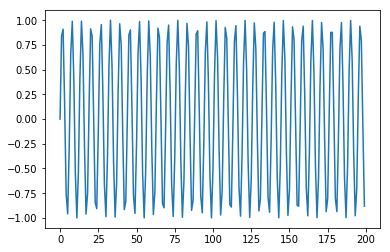

In [2]:
x = np.arange(0,200,1)
sin_wave = np.sin(x)

plt.plot(x,sin_wave)

Visualize a sequence of only 50, for example the 50 first values of the calculated sine wave.

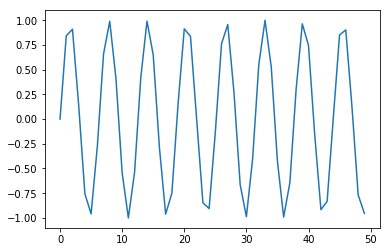

In [3]:
plt.plot(sin_wave[:50])

We will first set up the training data:

X should be an array of 100 sequences, that is, an array of arrays.

Y should be an array of 100 outputs, that is, for each input sequence, the value that follows the sequence.

hint: `X.append`, `Y.append`

Note that we loop for `num_records – 50` because we want to set aside the last 50 records as our validation data. 

In [4]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
X = np.array(X)
Y = np.array(Y)

If we plot the data we can check that X(t) is Y(t-1)

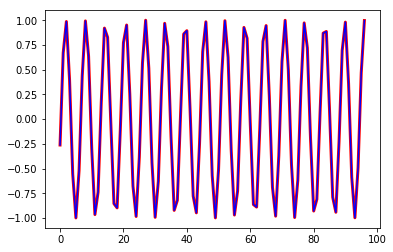

In [5]:
plt.plot(X[1:98,49] , 'r', linewidth=3)
plt.plot(Y[:97] , 'b')

Print the shape of the data: 

X should be an array of 100 sequences of 50.

Y should be an array of 100 values.

hint: `shape`

In [6]:
X.shape, Y.shape

((100, 50), (100,))

We reshape the data because we need one more dimension for the model

In [7]:
# Shape: (Batch size, Sequence_length, Number of indicators)
X = X.reshape(100, 50, 1)
X.shape, Y.shape

((100, 50, 1), (100,))

Autrement dit, X est constiué de 100 séquences de 50 éléments qui contiennent chacun une seule valeur.

Now, in a similar way to what we did with the training data, we setup the validation data:



In [8]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])

T = 50                   # length of sequence
X_val = np.array(X_val).reshape(50,T, 1)
Y_val = np.array(Y_val)
output_dim = 1
X_val.shape, Y_val.shape

((50, 50, 1), (50,))

X_val est constiué de 50 séquences de 50 éléments qui contiennent chacun une seule valeur.

Y_val est constitué de 50 valeurs (une par séquence contenue dans X_val)

Now we can instantiate a Keras model:

In [10]:
#definition of the model
model = Sequential()
model.add(LSTM(units = 3,input_shape=(50,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


Then we can test the model with only 5 iterations:

In [11]:
model.fit(X, Y, epochs=5, batch_size=1)

Epoch 1/5
100/100 [==============================] - 3s 33ms/step - loss: 0.4659
Epoch 2/5
100/100 [==============================] - 3s 25ms/step - loss: 0.4454
Epoch 3/5
100/100 [==============================] - 3s 25ms/step - loss: 0.4172
Epoch 4/5
100/100 [==============================] - 3s 25ms/step - loss: 0.3802
Epoch 5/5
100/100 [==============================] - 3s 26ms/step - loss: 0.3211


Get the predictions and plot them.

Hint `model.predict`

(100, 1)


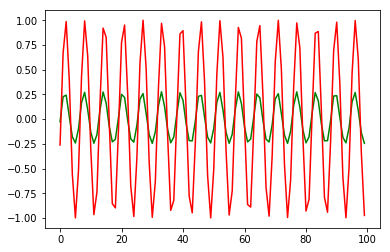

In [12]:
prediction = model.predict(X)
print(shape(prediction))
plt.plot(prediction.squeeze(), 'g')
plt.plot(Y.squeeze() , 'r')
plt.show()

We can see that the model is learning, but we need more iterations for a better fit.

In [13]:
model.fit(X, Y, epochs=10, batch_size=1)

Epoch 1/10
100/100 [==============================] - 3s 25ms/step - loss: 0.2445
Epoch 2/10
100/100 [==============================] - 3s 25ms/step - loss: 0.1548
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0804
Epoch 4/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0317
Epoch 5/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0108
Epoch 6/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0040
Epoch 7/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0023
Epoch 8/10
100/100 [==============================] - 3s 26ms/step - loss: 0.0017
Epoch 9/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0013
Epoch 10/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0011


Plot the new predictions: there should be a better fit now:

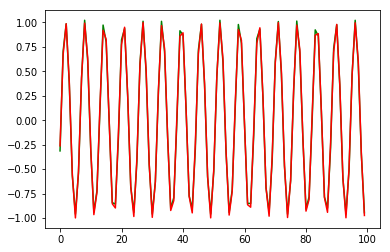

In [22]:
trainPredict = model.predict(X)
plt.plot( trainPredict , 'g')
plt.plot( Y, 'r')
plt.show()

Now, instead of working with training data, we can make predictions on the validation data:

In [19]:
# make predictions
testPredict = model.predict(X_val)
shape(testPredict)

(50, 1)

Calculate root mean squared error for the training and the validation data.

We expect the error to be very low on the training data, and a bit less low for the validation data.

Hint: `sklearn.metrics.mean_squared_error`

In [20]:
from sklearn.metrics import mean_squared_error as MSE
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Y, trainPredict.squeeze()))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict.squeeze()))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.03 RMSE


We plot the validation data to check if there is overfitting

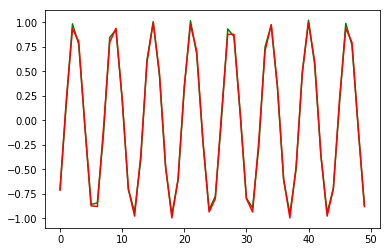

In [21]:
plt.plot( testPredict , 'g')
plt.plot( Y_val , 'r')
plt.show()

Great that's look pretty good....We can check with a clean model and less epochs and see....

Could also try with a different series, for example a square wave?